## Постановка задачи
Необходимо спрогнозировать, посетит ли клиент забронированное занятие, на основе истории посещаемости тренировок клиента. 
Цель - выявить закономерность и факторы,влияющие на неявку. 

### Подключение модулей

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


### Загрузка данных

In [26]:
df = pd.read_csv("fitness_class_2212.csv")

In [27]:
df.head(10)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
5,6,7,93.33,2,Mon,AM,Cycling,0
6,7,11,88.59,6,Wednesday,PM,HIIT,0
7,8,9,89.52,10,Fri,AM,HIIT,0
8,9,23,71.12,10,Fri.,AM,HIIT,1
9,10,7,81.25,10,Fri,AM,HIIT,0


### Описание данных

Признаки:
- booking_id - Уникальный идентификатор бронирования(ID бронирования)
- months_as_member - Сколько месяцев человек является клиентом фитнес-клуба
- weight - Вес клиента
- days_before - За сколько дней до занятия была сделана бронь
- day_of_week - День тренировки
- time - Запланированное время тренировки(день/вечер)
- category - Тип тренировки

Целевой (искомый) признак:

- attended - Факт посещения занятия

In [28]:
df.shape

(1500, 8)

Вывели общее количество строк и столбцов

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


Данные содержат 1500 записей и 8 столбцов с различными характеристиками клиентов.
Есть 20 пропусков в столбце "weight"

In [30]:
df.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


Есть аномалии в весе и в продолжительности посещения клиенты/клиентов клуба.

In [31]:
df[df['months_as_member'] > 60]['months_as_member'].value_counts()

months_as_member
73     2
65     2
66     2
105    1
90     1
76     1
62     1
89     1
107    1
61     1
97     1
93     1
148    1
111    1
69     1
Name: count, dtype: int64

Сначала проанализируем клиентов, которые посещают клуб более 5 лет

In [32]:
df = df[df['months_as_member'] <= 60].copy()

Удалили аномалии в посещаемости. Остались только клиенты,которые посещают клуб не более 5 лет.

In [33]:
df[df['weight'] > 120]['weight'].value_counts()

weight
148.02    1
124.30    1
135.18    1
122.36    1
120.58    1
170.52    1
121.38    1
123.90    1
120.81    1
127.59    1
136.02    1
133.36    1
129.28    1
Name: count, dtype: int64

Также проанализируем клиентов с аномальным весом

In [34]:
df = df[df['weight'] <= 140].copy()

Удалили аномалии в весе клиентов.Остались клиенты с весом меньше 140 кг

In [35]:
df.isna().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

Пропуски не найдены.

In [36]:
(df == "-").sum()

booking_id           0
months_as_member     0
weight               0
days_before          0
day_of_week          0
time                 0
category            13
attended             0
dtype: int64

Есть 13 пропусков в столбце категории.

In [37]:
df = df[df['category'] != "-"].copy()

In [38]:
(df == "-").sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

Удалили данные пропуски.

In [39]:
print(df.duplicated().sum())

0


Дубликатов не найдено.

In [40]:
df.shape

(1447, 8)

#### Вывод

Данные подготовлены к дальнейшему анализу. Датасет после исправления аномалий содержит 1447 записей и 8 признаков. Все пропуски были удалены, дубликатов не найдено. Основные типы данных: числовые, дробные, строковые.

## Разведочный анализ данных (EDA)

## Одномерный анализ данных

#### Рассмотрим распределение данных числовых признаков

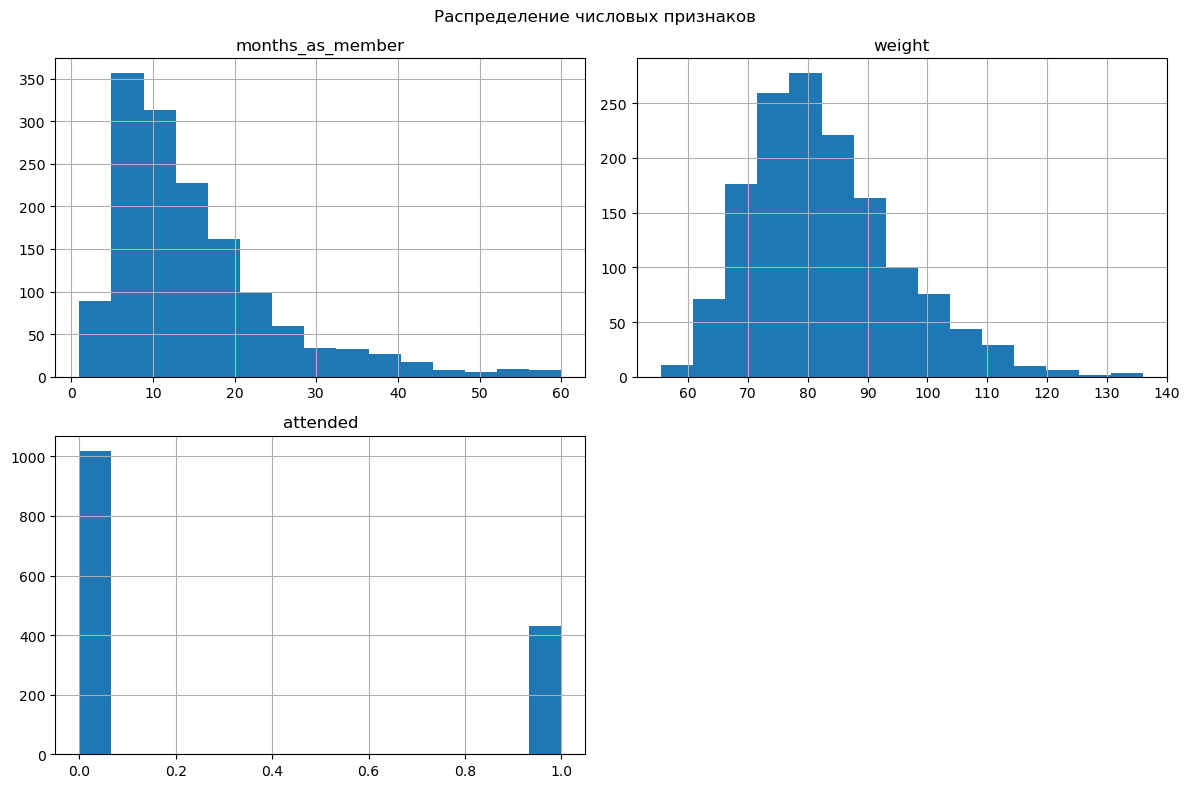

In [41]:
df[['months_as_member', 'weight', 'days_before', 'attended']].hist(figsize=(12, 8), bins=15)
plt.suptitle('Распределение числовых признаков')
plt.tight_layout()
plt.show()

#### Отметим популярные дни для бронирования

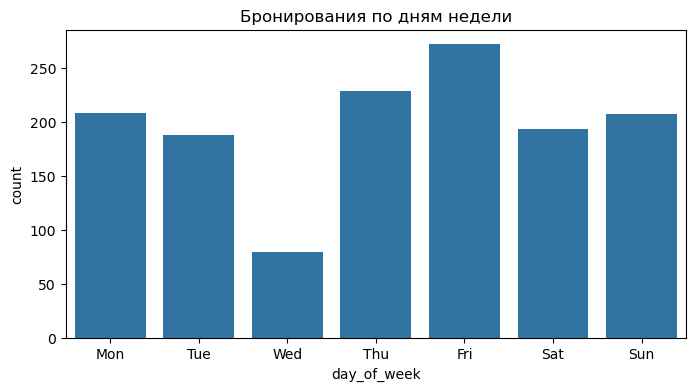

In [42]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='day_of_week', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Бронирования по дням недели')
plt.show()

#### Посмотрим, в какое время дня клиенты предпочитают пребывать на занятиях

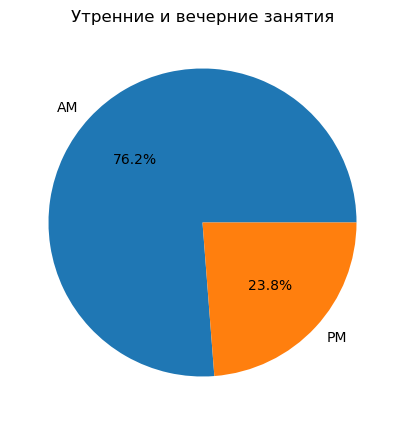

In [55]:
plt.figure(figsize=(5, 5))
df['time'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Утренние и вечерние занятия')
plt.ylabel('')
plt.show()

#### Определим популярные направления тренировок

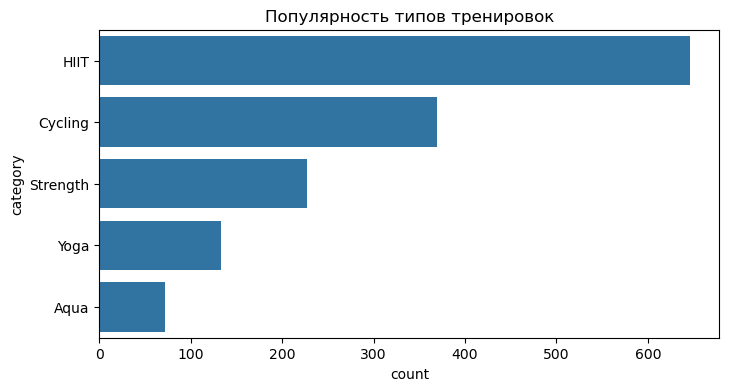

In [50]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index)
plt.title('Популярность типов тренировок')
plt.show()

#### Проверим посещяемость клиентов в % соотношении

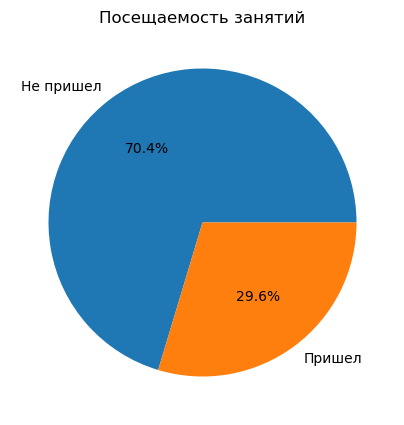

In [52]:
plt.figure(figsize=(5, 5))
df['attended'].map({0: 'Не пришел', 1: 'Пришел'}).value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Посещаемость занятий')
plt.ylabel('')
plt.show()

### Вывод одномерного анализа

Одномерный анализ показал, что большинство клиентов не посещают занятия. Подавляющее число клиентов предпочитают заниматься утром. Самое популярное направление бронирования - HIIT (High-Intensity Interval Training). Наибольшее количество занятий забронировано на пятницу, наименьшее - на среду.

## Многомерный анализ данных

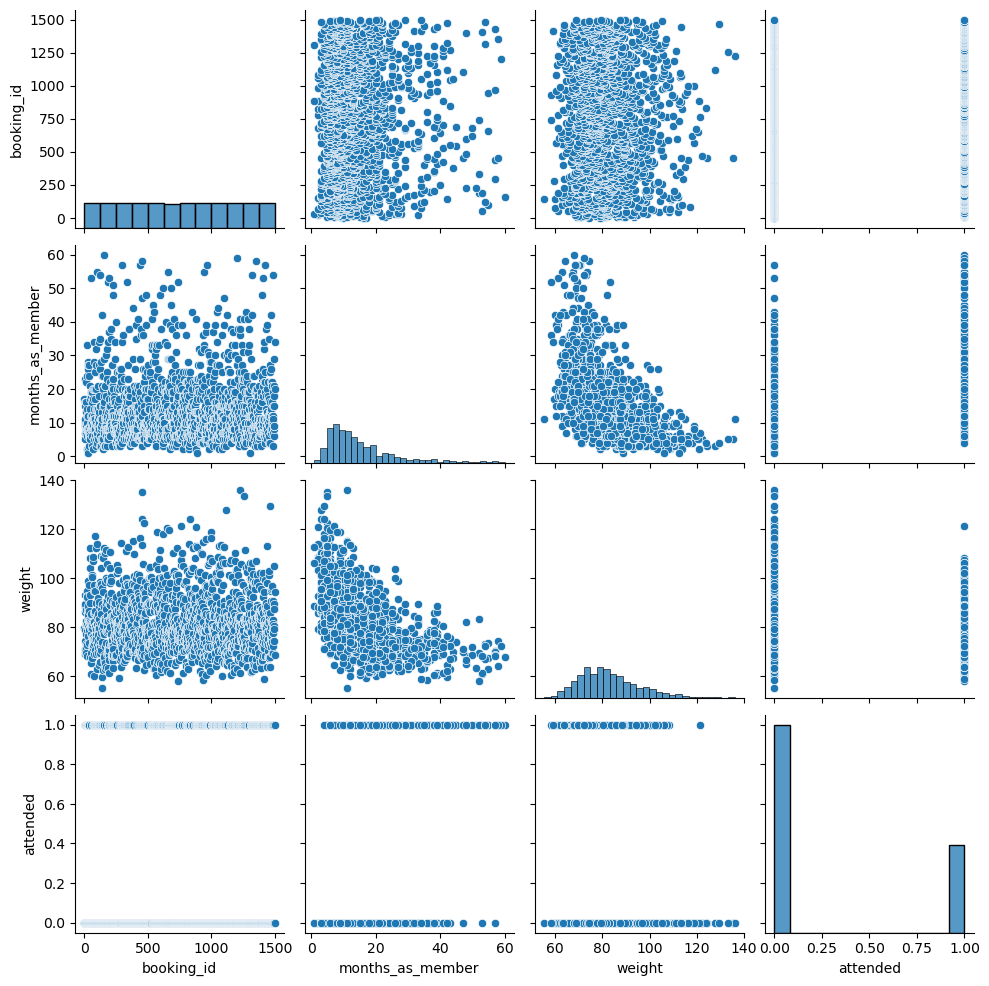

In [62]:
sns.pairplot(data=df)
plt.show()

#### Заменяем вхождение 'days' для более детального анализа

In [66]:
df['days_before'] = pd.to_numeric(df['days_before'].astype(str).str.replace(' days', ''))

In [72]:
category_mapping = {
    'HIIT': 0,
    'Cycling': 1, 
    'Strength': 2,
    'Yoga': 3,
    'Aqua': 4
}
df['category_encoded'] = df['category'].map(category_mapping)

In [73]:
numeric_features = ['months_as_member', 'weight', 'days_before', 'category_encoded', 'attended']
df_corr = df[numeric_features].corr()
df_corr

,months_as_member,weight,days_before,category_encoded,attended
months_as_member,1.000000,-0.500893,0.010818,0.000324,0.494432
weight,-0.500893,1.000000,-0.007404,-0.016895,-0.272430
days_before,0.010818,-0.007404,1.000000,0.045459,0.018908
category_encoded,0.000324,-0.016895,0.045459,1.000000,-0.012303
attended,0.494432,-0.272430,0.018908,-0.012303,1.000000


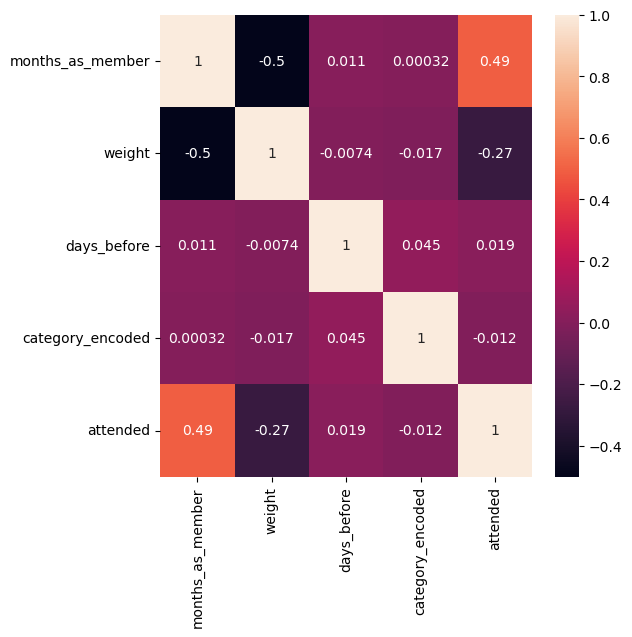

In [74]:
plt.figure(figsize=(6, 6))
sns.heatmap(df_corr, annot = True)
plt.show()

## Стаж членства - важнейший фактор

In [ ]:
came = df[df['attended']==1]['months_as_member'].mean()
not_came = df[df['attended']==0]['months_as_member'].mean()

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='attended', hue='attended', y='months_as_member', palette='Set2')
plt.title('Стаж членства: пришёл и не пришёл', fontsize=16, fontweight='bold')
plt.xticks([0,1], ['Не пришёл', 'Пришёл'])
plt.show()

In [77]:
cat_att = df.groupby('category')['attended'].agg(['count', 'mean']).round(3)
cat_att['mean'] = (cat_att['mean'] * 100).round(1)
cat_att = cat_att.sort_values('mean', ascending=False)
cat_att.columns = ['Бронирований', 'Посещаемость (%)']
cat_att.style.background_gradient(cmap='RdYlGn', subset='Посещаемость (%)')

,Бронирований,Посещаемость (%)
category,,
Aqua,72,31.900000
HIIT,646,31.000000
Yoga,133,30.800000
Cycling,369,29.000000
Strength,227,25.600000


### Вывод многомерного анализа

Самый влиятельный фактор посещения клиентов - длительность нахождения в клубе. Посещаемость не зависит от веса и не зависит от направления тренировок.

## Обучение моделей

### Подготовка к обучению

#### Признаки для предсказания

In [79]:
features = ['months_as_member', 'weight', 'days_before', 'category_encoded']

#### Целевая переменная

In [80]:
target = 'attended'

#### Разделение данных для обучения

In [81]:
X = df[features]
y = df[target]

#### Разделяем на тренировочные и практические тесты

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Модель обучения - Логистическая регрессия

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report, roc_curve)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [90]:
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [91]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [92]:
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

Accuracy:  0.7793
Precision: 0.6667
Recall:    0.4198
F1-score:  0.5152
ROC-AUC:   0.8212


In [96]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       209
           1       0.67      0.42      0.52        81

    accuracy                           0.78       290
   macro avg       0.74      0.67      0.69       290
weighted avg       0.77      0.78      0.76       290



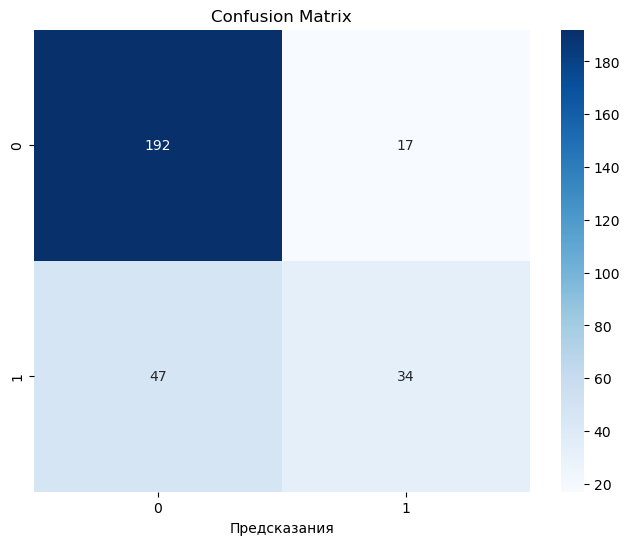

In [98]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.ylabel('')
plt.xlabel('Предсказания')
plt.show()

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

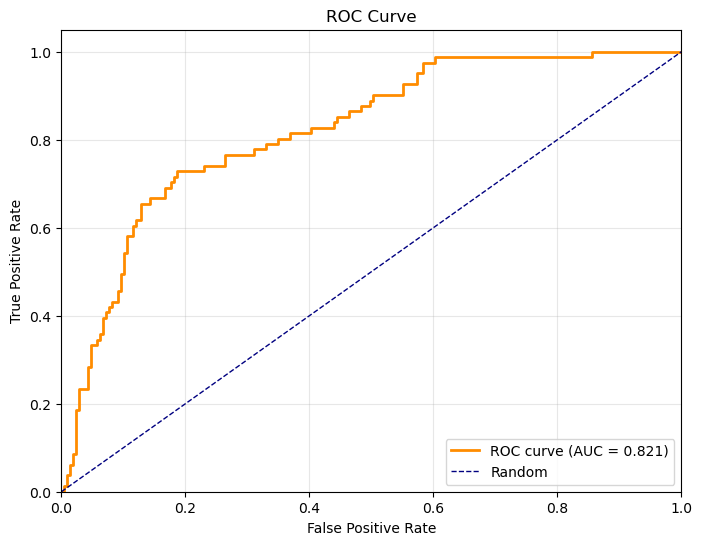

In [101]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

### Вывод обучения модели

Модель показала неплохие результаты. Она довольно хорошо умеет разделять классы - AUC = 0.82. Точность предсказаний достигает 78%.

## Модель обучения - дерево решений

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dt_model = DecisionTreeClassifier(
    max_depth=3, 
    min_samples_split=10,
    min_samples_leaf=5,    
    random_state=42,
    class_weight='balanced'
)

In [106]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [107]:
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

In [108]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

In [109]:
print(f"Accuracy:  {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall:    {recall_dt:.4f}")
print(f"F1-score:  {f1_dt:.4f}")
print(f"ROC-AUC:   {roc_auc_dt:.4f}")

Accuracy:  0.7517
Precision: 0.5405
Recall:    0.7407
F1-score:  0.6250
ROC-AUC:   0.8083


In [111]:
print(classification_report(y_test, y_pred_dt, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81       209
           1       0.54      0.74      0.62        81

    accuracy                           0.75       290
   macro avg       0.71      0.75      0.72       290
weighted avg       0.79      0.75      0.76       290



In [112]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)

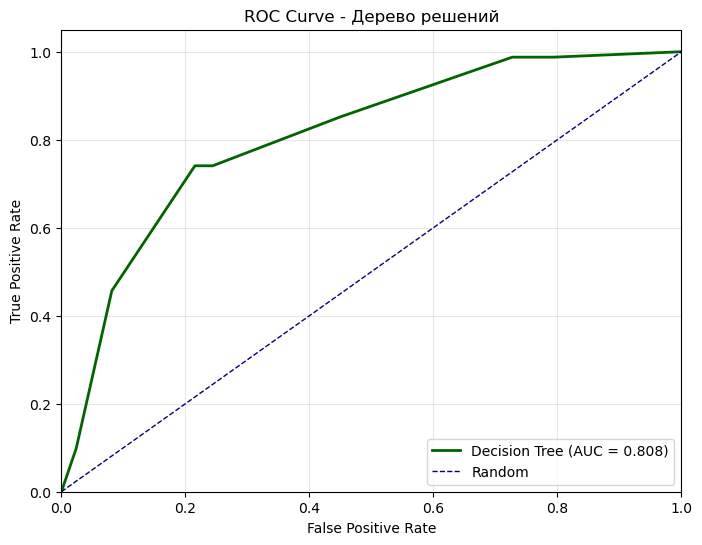

In [113]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkgreen', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Дерево решений')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

### Вывод обучения модели

Данная модель продемонстрировала результаты чуть хуже, чем предыдущая модель. Улучшен результат метрики Recall, значит модель хорошо распознает реальные посещения. В связи с улучшением метрики Recall, также был улучшен результат метрики f1-score. Точность предсказаний не сильно просела.

## Модель обучения - Случайный лес

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rf_model = RandomForestClassifier(
    n_estimators=100,  
    max_depth=5,        
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced'
)

In [118]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [119]:
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [120]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

In [121]:
print(f"Accuracy:  {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1-score:  {f1_rf:.4f}")
print(f"ROC-AUC:   {roc_auc_rf:.4f}")

Accuracy:  0.7276
Precision: 0.5082
Recall:    0.7654
F1-score:  0.6108
ROC-AUC:   0.8031


In [122]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['0', '1']))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       209
           1       0.51      0.77      0.61        81

    accuracy                           0.73       290
   macro avg       0.70      0.74      0.70       290
weighted avg       0.78      0.73      0.74       290



In [123]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

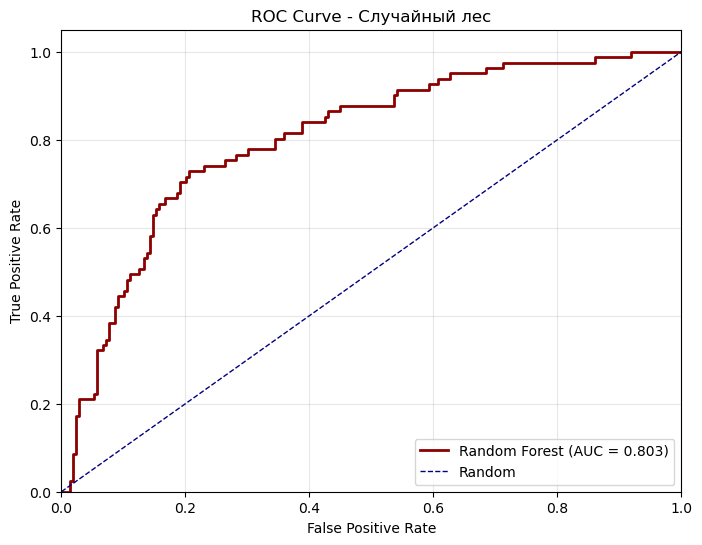

In [124]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkred', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Случайный лес')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

### Вывод обучения модели

Модель продемонстрировала результаты чуть хуже, чем предыдущая, за исключением метрики Recall, результат которой был немного улучшен. При сравнении остальных метрик модель не сильно просела по отношению к предыдущей.

## Вывод обучения моделей

Все модели показали неплохой результат. Лучшей моделью по показателям метрик является модель, основанная на логистической регрессии. Две другие модели показали результат чуть хуже, но метрика Recall в обоих моделях превзошла 